In [1]:
# implementation of batch normalization
import tensorflow as tf
import keras

In [3]:
network = keras.models.Sequential()
network.add(tf.keras.layers.Dense(16, input_shape=(1, 5), activation=tf.keras.activations.relu))
network.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.relu))
network.add(tf.keras.layers.BatchNormalization(axis=1))
network.add(tf.keras.layers.Dense(32, activation=tf.keras.activations.softmax))

network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1, 16)             96        
                                                                 
 dense_4 (Dense)             (None, 1, 32)             544       
                                                                 
 batch_normalization_1 (Bat  (None, 1, 32)             4         
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 1, 32)             1056      
                                                                 
Total params: 1700 (6.64 KB)
Trainable params: 1698 (6.63 KB)
Non-trainable params: 2 (8.00 Byte)
_________________________________________________________________


In [15]:
# implementing batch normaliztion with mnist dataset
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import utils as numpy_utils

5

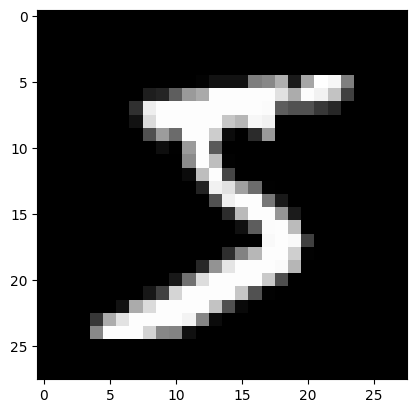

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0], cmap=plt.get_cmap("gray"))
y_train[0]


In [23]:
x_train, x_test = x_train[:5000]/255, x_test[:1000]/255
y_train, y_test = numpy_utils.to_categorical(y_train[:5000], num_classes=10), numpy_utils.to_categorical(y_test[:1000], num_classes=10)
y_train.shape

(5000, 10)

In [24]:
# create dataset from datas
train_dataset = tf.data.Dataset.zip(tf.data.Dataset.from_tensor_slices(x_train), tf.data.Dataset.from_tensor_slices(y_train)).shuffle(50)
valid_dataset = tf.data.Dataset.zip(tf.data.Dataset.from_tensor_slices(x_train), tf.data.Dataset.from_tensor_slices(y_train)).shuffle(50)

In [25]:
# create model
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(10, activation="softmax"),
    ])
model.build()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_4 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 300)               90300     
                                                                 
 batch_normalization_5 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 10)               

In [29]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(), 
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=[tf.keras.metrics.CategoricalCrossentropy()])

In [31]:
model.fit(x_train, 
          y_train, 
          batch_size=64, 
          epochs=9, 
          validation_data=(x_test, y_test))

Epoch 1/9
79/79 [==============================] - 0s 3ms/step - loss: 0.0582 - categorical_crossentropy: 0.0582 - val_loss: 0.2025 - val_categorical_crossentropy: 0.2025
Epoch 2/9
79/79 [==============================] - 0s 2ms/step - loss: 0.0319 - categorical_crossentropy: 0.0319 - val_loss: 0.1892 - val_categorical_crossentropy: 0.1892
Epoch 3/9
79/79 [==============================] - 0s 2ms/step - loss: 0.0249 - categorical_crossentropy: 0.0249 - val_loss: 0.2041 - val_categorical_crossentropy: 0.2041
Epoch 4/9
79/79 [==============================] - 0s 2ms/step - loss: 0.0171 - categorical_crossentropy: 0.0171 - val_loss: 0.2206 - val_categorical_crossentropy: 0.2206
Epoch 5/9
79/79 [==============================] - 0s 2ms/step - loss: 0.0102 - categorical_crossentropy: 0.0102 - val_loss: 0.1993 - val_categorical_crossentropy: 0.1993
Epoch 6/9
79/79 [==============================] - 0s 2ms/step - loss: 0.0089 - categorical_crossentropy: 0.0089 - val_loss: 0.1973 - val_categor